In [1]:
library(Seurat)
library(ggplot2)
library(magrittr)
library(data.table)
library(Matrix)
library(dplyr)
library(tibble)
library(MAST)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
 

In [2]:
seu_HQC <- readRDS(file = "../../data/seurat_object/all_integration/seu_HQC_subclustered_integrated.obj")
seu_HQC

An object of class Seurat 
25136 features across 13467 samples within 2 assays 
Active assay: SCT (12568 features, 3000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, harmony

In [3]:
levels <- read.table(file="./manual_ID_levels_color_integration.txt", comment.char = '')
colors <- levels[,2]
levels <- levels[,1]
head(levels)
length(levels)
head(colors)

[1] "ectoderm_head_fkh"             "ectoderm_head_croc"           
[3] "ectoderm_head_Optix_Six4_SoxN" "ectoderm_head_Optix_Six4_grn" 
[5] "ectoderm_head_Optix_toy"       "ectoderm_head_Optix_CenG1A"

[1] 68

[1] "lightsteelblue1" "lightsteelblue1" "lightsteelblue2" "lightsteelblue2"
[5] "lightsteelblue3" "lightsteelblue3"

In [4]:
annot_df <- read.csv('./annot_df.csv')
annot_df

X  cluster_id cluster_name                          
1   1  1         endoderm_antMG_wntD                   
2   2  2         mesoderm_head                         
3   3  3         endoderm_antMG_wg                     
4   4  4         ectoderm_intermediate_NE_PS1          
5   5  5         ectoderm_medial_NE_PS1                
6   6  6         ectoderm_medial_DE_PS1                
7   7  7         ectoderm_lateral_DE_PS1               
8   8  8         ectoderm_lateral_NE_PS1               
9   9  9         midline_cells_PS1-3                   
10 10 10         amnioserosa_PS1                       
11 11 11         ectoderm_lateral_NE_abdominal         
12 12 12         ectoderm_DE_PS0                       
13 13 13         ectoderm_lateral_NE_PS2               
14 14 14         amnioserosa_PS2                       
15 15 15         ectoderm_head_Optix_Six4_grn          
16 16 16         ectoderm_head_oc_so                   
17 17 17         ectoderm_head_oc_Doc2                 
18 18 18         ectoderm_intermediate_NE_PS0          
19 19 19         ectoderm_head_Optix_CenG1A            
20 20 20         ectoderm_PS0_ems                      
21 21 21         ectoderm_head_kn_lateral              
22 22 22         ectoderm_head_croc                    
23 23 23         ectoderm_head_oc_Pvf3                 
24 24 24         ectoderm_head_Dfd_Oaz                 
25 25 25         ectoderm_head_oc_so_toy               
26 26 26         ectoderm_medial_NE_PS0                
27 27 27         ectoderm_head_oc_CenG1A               
28 28 28         ectoderm_lateral_NE_PS0               
29 29 29         ectoderm_head_fkh                     
30 30 30         ectoderm_head_kn_medial               
⋮  ⋮  ⋮          ⋮                                     
39 39 39         ectoderm_intermediate_DE_abdominal    
40 40 40         ectoderm_intermediate_DE_PS2          
41 41 41         ectoderm_lateral_DE_abdominal         
42 42 42         ectoderm_intermediate_NE_abdominal    
43 43 43         ectoderm_PS14_dorsal                  
44 44 44         ectoderm_intermediate_NE_PS2          
45 45 45         ectoderm_medial_NE_PS2                
46 46 46         ectoderm_lateral_DE_PS2               
47 47 47         ectoderm_hindgut_dorsal               
48 48 48         endoderm_postMG_dorsal                
49 49 49         mesoderm_PS1_Dfd                      
50 50 50         mesoderm_PS2_ken                      
51 51 51         mesoderm_gcm_Dfd                      
52 52 52         mesoderm_gcm                          
53 53 53         mesoderm_abdominal_even               
54 54 54         mesoderm_PS4_and_PS6                  
55 55 55         mesoderm_PS5                          
56 56 56         mesoderm_abdominal_odd                
57 57 57         mesoderm_PS3                          
58 58 58         pole_cells                            
59 59 59         mesoderm_PS14                         
60 60 60         mesoderm_PS13                         
61 61 61         mesoderm_PS14/mesoderm_caudal_visceral
62 62 62         mesoderm_caudal_visceral              
63 63 63         ectoderm_PS14_ventral                 
64 64 64         midline_cells_abdominal_even          
65 65 65         midline_cells_abdominal_odd           
66 66 66         endoderm_postMG_ventral               
67 67 67         endoderm_postMG_lateral               
68 68 68         ectoderm_PS14/hindgut

In [5]:
Idents(seu_HQC) <- 'manual_ID'
levels(seu_HQC) <- levels
all.markers <- FindAllMarkers(seu_HQC, method = 'MAST')
head(all.markers)

Calculating cluster ectoderm_head_fkh

Calculating cluster ectoderm_head_croc

Calculating cluster ectoderm_head_Optix_Six4_SoxN

Calculating cluster ectoderm_head_Optix_Six4_grn

Calculating cluster ectoderm_head_Optix_toy

Calculating cluster ectoderm_head_Optix_CenG1A

Calculating cluster ectoderm_head_oc_eya

Calculating cluster ectoderm_head_oc_so_toy

Calculating cluster ectoderm_head_oc_so

Calculating cluster ectoderm_head_oc_Doc2

Calculating cluster ectoderm_head_oc_CenG1A

Calculating cluster ectoderm_head_oc_Pvf3

Calculating cluster ectoderm_head_kn_lateral

Calculating cluster ectoderm_head_kn_medial

Calculating cluster ectoderm_head_Dfd_Oaz

Calculating cluster ectoderm_PS0_ems

Calculating cluster ectoderm_DE_PS0

Calculating cluster ectoderm_lateral_NE_PS0

Calculating cluster ectoderm_intermediate_NE_PS0

Calculating cluster ectoderm_medial_NE_PS0

Calculating cluster ectoderm_medial_DE_PS1

Calculating cluster ectoderm_lateral_DE_PS1

Calculating cluster ectoderm_la

p_val         avg_logFC pct.1 pct.2 p_val_adj     cluster          
croc     6.177345e-147 2.0896384 0.844 0.032 7.763687e-143 ectoderm_head_fkh
fd102C   6.376575e-137 1.6667861 0.750 0.027 8.014080e-133 ectoderm_head_fkh
CG10553  3.538786e-123 0.6259704 0.438 0.010 4.447546e-119 ectoderm_head_fkh
p38c     2.085843e-119 0.7710086 0.531 0.015 2.621487e-115 ectoderm_head_fkh
PGRP-SC2  2.918411e-89 0.9819075 0.656 0.031  3.667859e-85 ectoderm_head_fkh
Optix     2.964530e-86 1.4960487 0.844 0.054  3.725821e-82 ectoderm_head_fkh
         gene    
croc     croc    
fd102C   fd102C  
CG10553  CG10553 
p38c     p38c    
PGRP-SC2 PGRP-SC2
Optix    Optix

In [6]:
all.markers.top10 <- all.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.top10)

[1] 680

Warning message in DoHeatmap(seu_HQC, features = c(all.markers.top10$gene), group.colors = colors, :
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: Pepck-CG45087, CG4456”


NULL

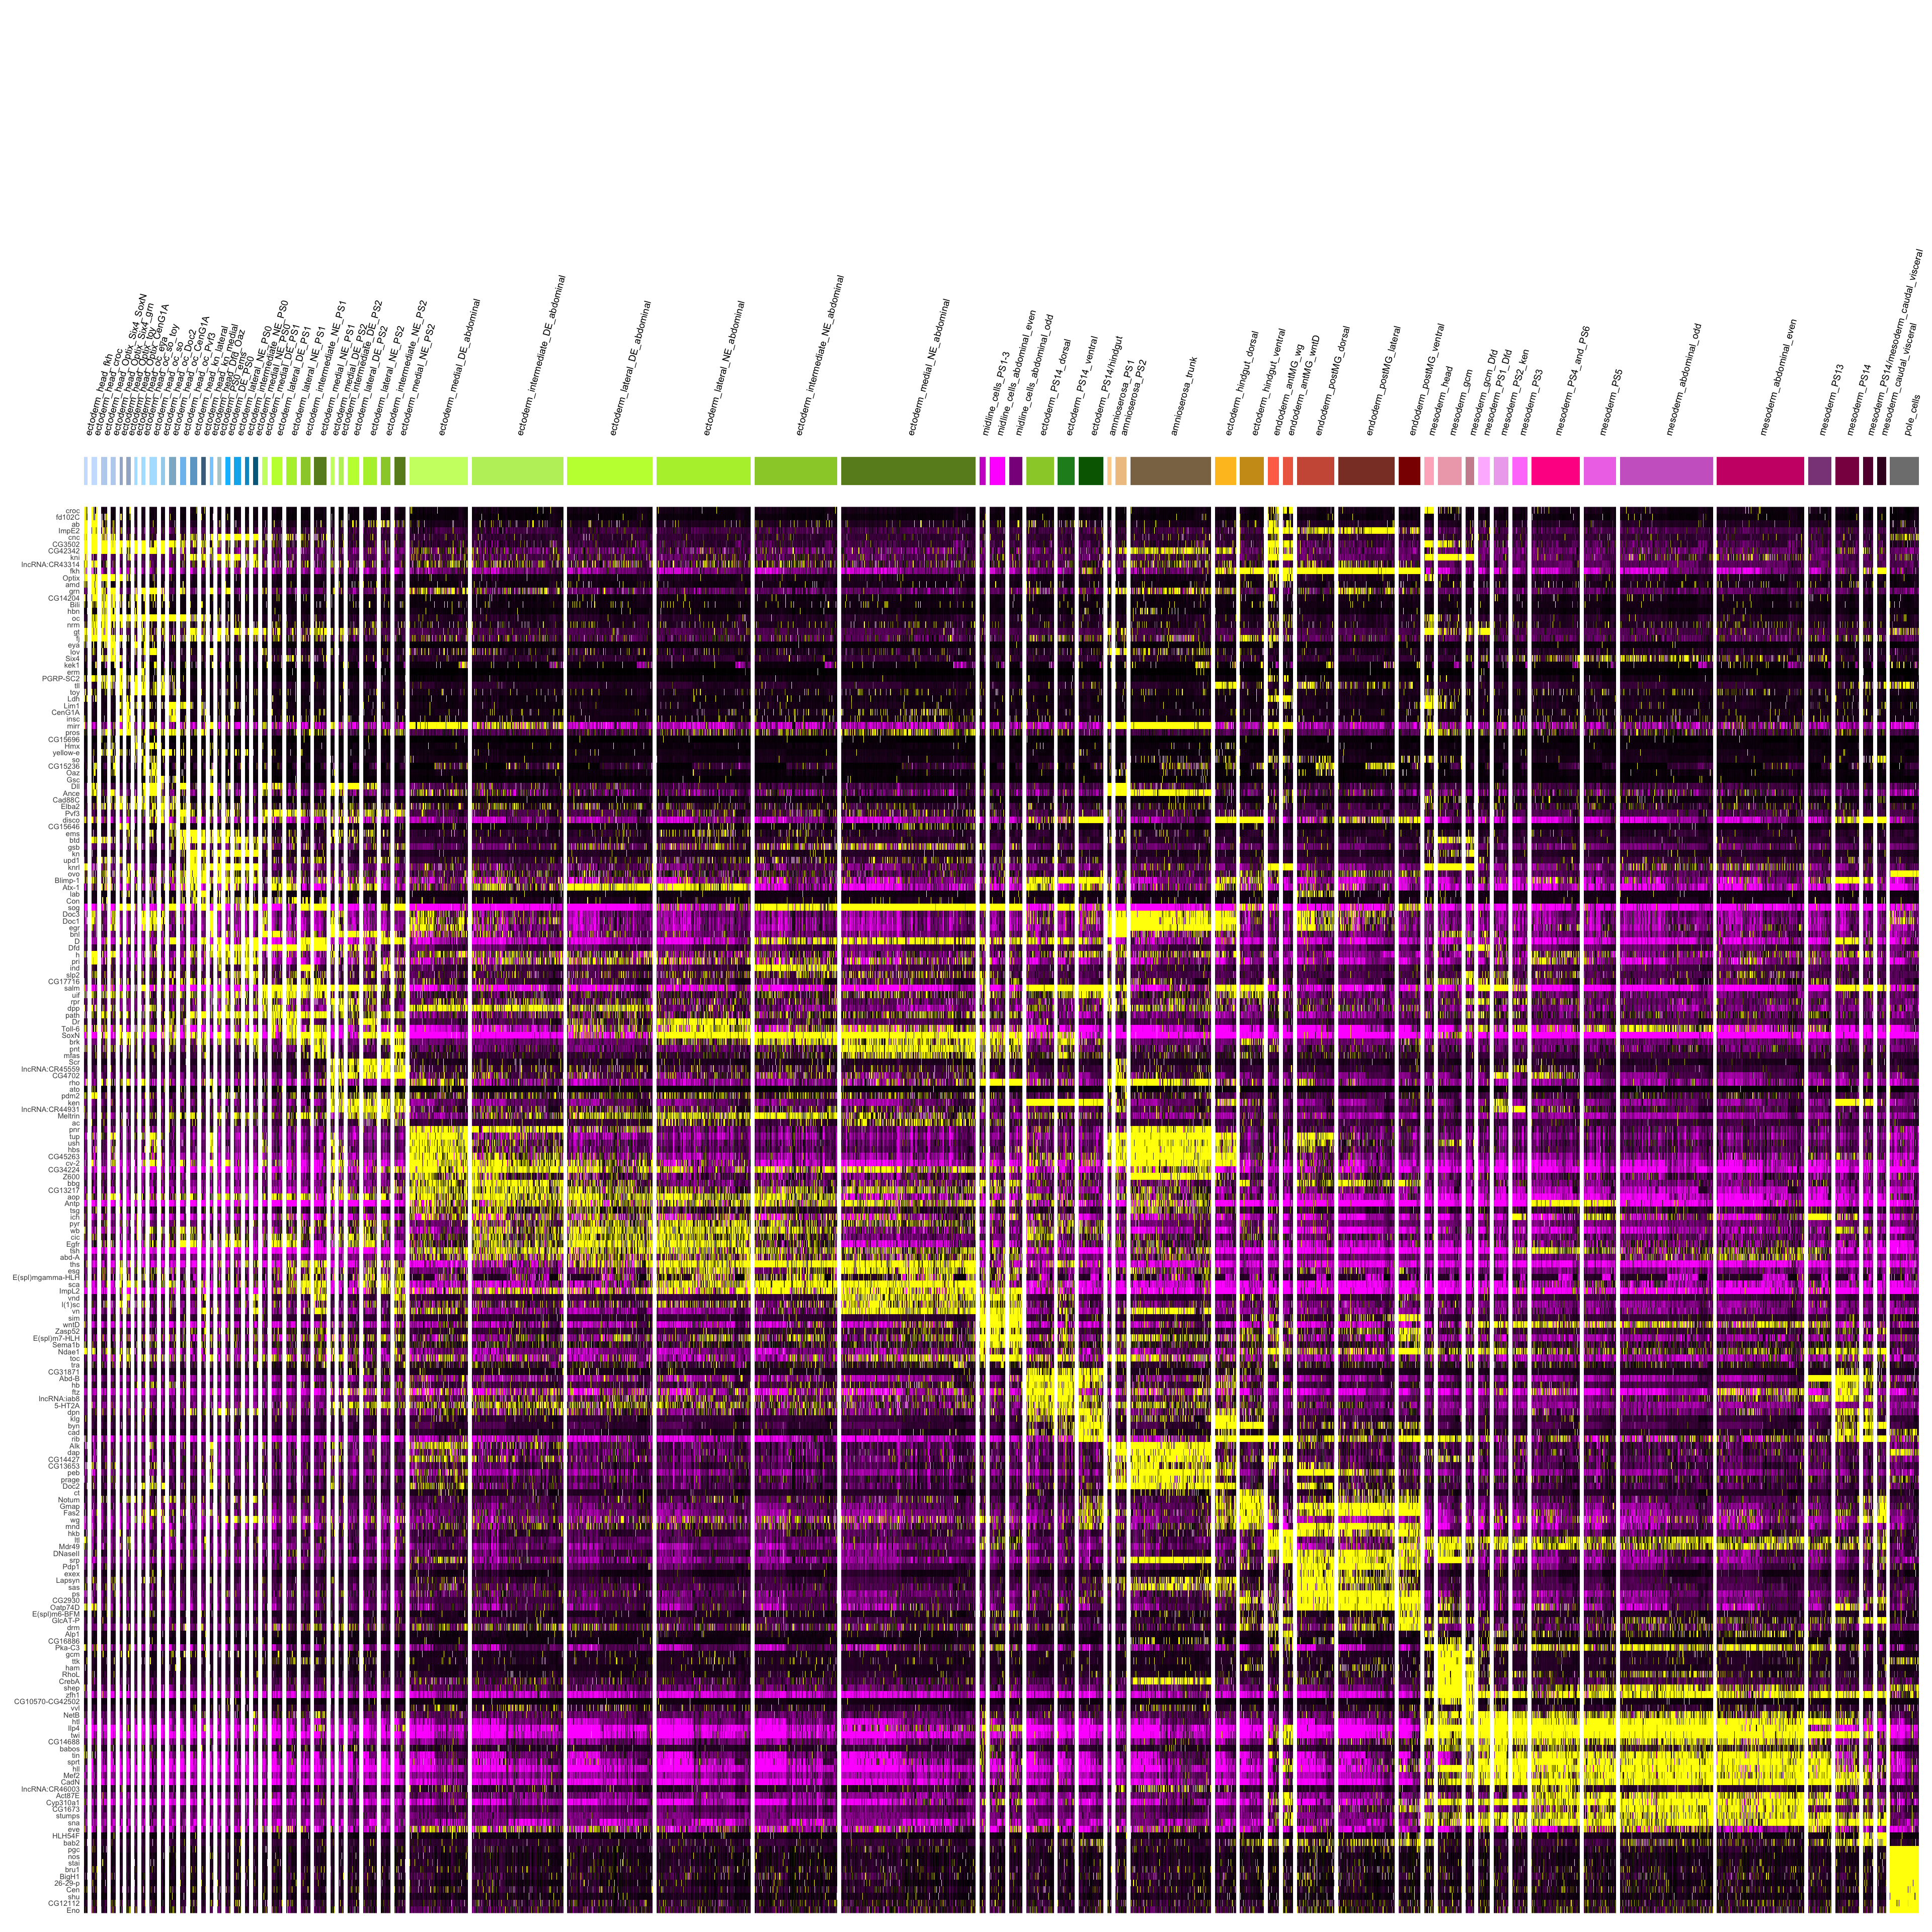

In [7]:
options(repr.plot.width=32, repr.plot.height=32)
DoHeatmap(seu_HQC, features = c(all.markers.top10$gene), group.colors = colors,
          angle = 75, size=4)  + NoLegend() 
ggsave(file = "./figures/08_FindAllMarkers_integration/All_cells_heatmap_manual_ID_integration.eps", width = 32, height = 32) +
theme(plot.margin = unit(c(1,1,1,1), "cm"))

Warning message in DoHeatmap(seu_HQC, features = c(all.markers.top10$gene), group.colors = colors, :
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: Pepck-CG45087, CG4456”


NULL

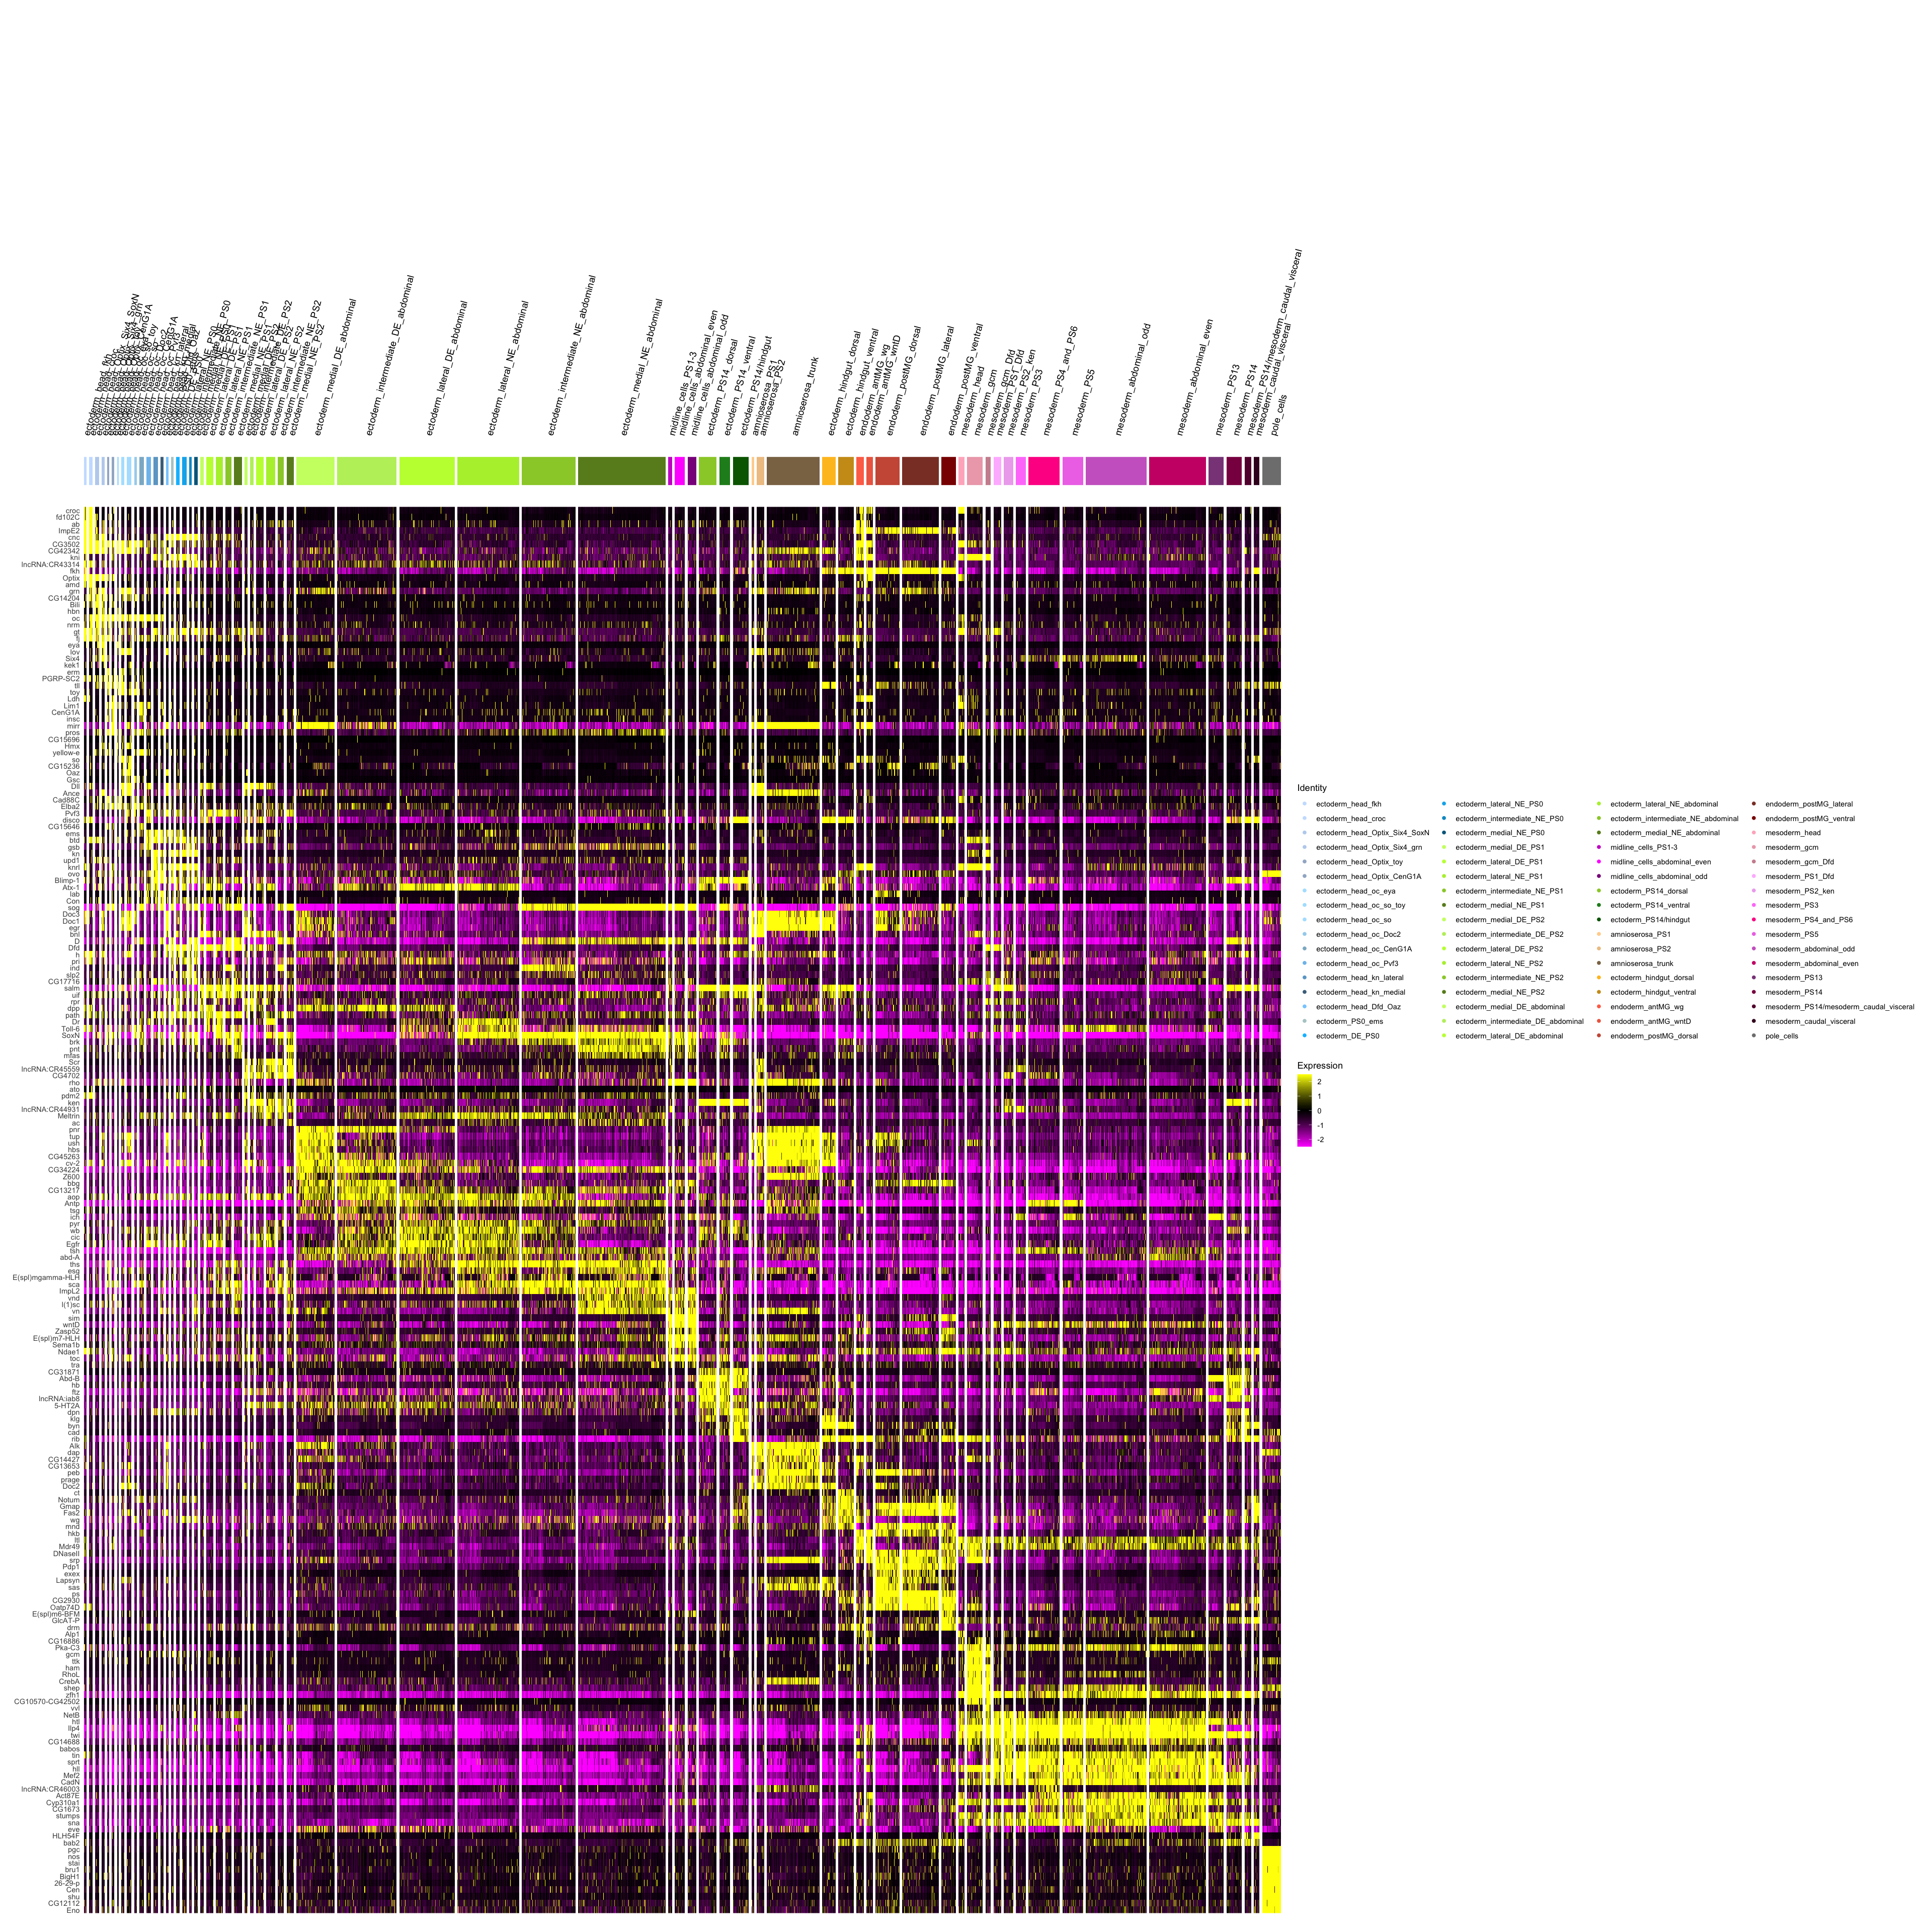

In [8]:
options(repr.plot.width=32, repr.plot.height=32)
DoHeatmap(seu_HQC, features = c(all.markers.top10$gene), group.colors = colors,
          angle = 75, size=4) 
ggsave(file = "./figures/08_FindAllMarkers_integration/All_cells_heatmap_manual_ID_with_legend_integration.eps", width = 32, height = 32) +
theme(plot.margin = unit(c(1,1,1,1), "cm"))

In [9]:
manual_ID <- all.markers$cluster
unique.manual_ID <- unique(manual_ID)
manual_ID_num <- copy(manual_ID)
i <- 1
for (name in unique.manual_ID){
    rname <- paste('^',name, sep = '')
    rname <- paste(rname, '$', sep = '')
    manual_ID_num <- gsub(manual_ID_num, pattern = rname, replacement = i)
    i <- i + 1
}
all.markers$cluster_num <- manual_ID_num

In [10]:
write.csv(x = all.markers, file = './all_markers_integration.csv')

In [11]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] MAST_1.16.0                 SingleCellExperiment_1.12.0
 [3] SummarizedExperiment_1.20.0 Biobase_2.50.0             
 [5] GenomicRanges_1.42.0        GenomeInfoDb_1.26.2        
 [7] IRanges_2.24.1              S4Vectors_0.28.1           
 [9] BiocGenerics_0.36.0         MatrixGenerics_1.2.0       
[11] matrixStats_0.57.0          tibble_3.0.5               
[13] dplyr_1.0.3                 Matrix_1.3-2               
[15] data.table_1.13.6           magrittr_2.0.1